## Graduate Admission Prediction

Let’s go through the problem statement.The problem statement is as follows:

The purpose of this task is to helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.


#### Dataset Description

The parameters included are :
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [35]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns

In [36]:
df = pd.read_csv('Admission_Prediction.csv')

In [37]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
df.set_index('Serial No.',inplace=True)

In [39]:
df.shape

(500, 8)

In [40]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [41]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [42]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

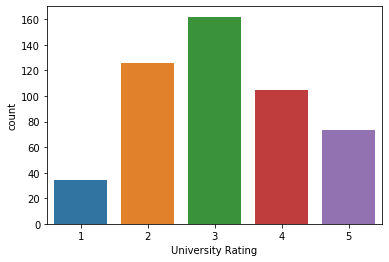

In [43]:
sns.countplot(df['University Rating'])
plt.show()

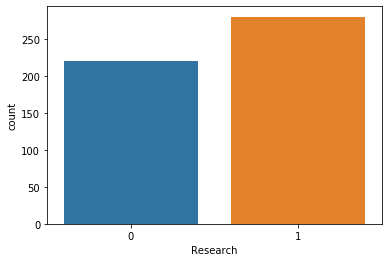

In [44]:
sns.countplot(df['Research'])
plt.show()

In [45]:
# Spliting dataframe into input features and target variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [46]:
x.shape

(500, 7)

In [47]:
y.shape

(500,)

In [48]:
# Splitting Data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [50]:
# Training of data using machine learning algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
from sklearn.metrics import mean_squared_error,r2_score

In [52]:
y_predict = np.round(lr.predict(x_test),2)

In [53]:
r2Score = r2_score(y_test,y_predict)

In [54]:
r2Score

0.8070497036361836

In [55]:
rmse = np.sqrt(mean_squared_error(y_test,y_predict))

In [56]:
rmse

0.06035726965329031